In [143]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [92]:
np.random.seed(43)
x = np.linspace(0, 20, 15)
y = 5 * x + np.random.normal(0.0, 20.0, 15)
X = x.reshape(15, 1)

In [144]:
pipe = make_pipeline(
    MyOwnFancyFeatureEngineeringSuperTool(my_param='X'),
    PolynomialFeatures(degree=20),
    MinMaxScaler(),
    Ridge(alpha=0.1)
)

In [146]:
params = {
    'polynomialfeatures__degree': [1, 5, 10],
    'ridge__alpha': [1.0, 0.1, 0.001]
}
GridSearchCV(pipe, params).fit(X, y)

{'polynomialfeatures': PolynomialFeatures(degree=20, include_bias=True, interaction_only=False,
                    order='C'),
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'ridge': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)}

In [145]:
pipe.fit(X, y)
pipe.score(X, y)

0.809535367037967

In [93]:
p = PolynomialFeatures(degree=20)
Xt = p.fit_transform(X)

In [94]:
sc = MinMaxScaler()
Xt = sc.fit_transform(Xt)

In [138]:
# m = LinearRegression()
m = Lasso(alpha=0.1)
m.fit(Xt, y)
m.score(Xt, y)

0.8377941767530783

<BarContainer object of 21 artists>

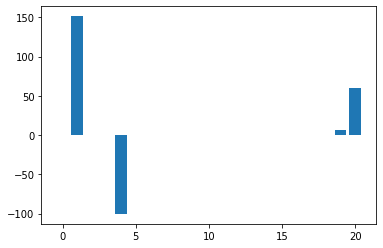

In [139]:
plt.bar(range(21), m.coef_)

In [140]:
ypred = m.predict(Xt)

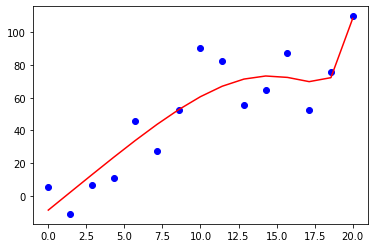

In [141]:
plt.plot(x, y, 'bo')
plt.plot(x, ypred, 'r-')

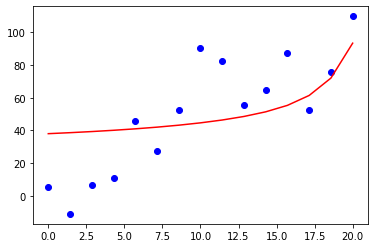

In [99]:
plt.plot(x, y, 'bo')
plt.plot(x, ypred, 'r-')